## Final Project Submission

Please fill out:
* Student name: Kregg Jackson 
* Student pace: self paced
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@kr3ggjac.cj/data-science-effect-on-professional-sports-b11d3dc3e350


# Kansas City House Data Analysis
## Project Goal
With analysis of each column’s relationship with price I can suggest what renovations have the greatest impact on sales.


In [1]:
# Imports
import pandas as pd
import os,glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
#assign data frame folder
folder = "/Users/kregg/dsc-phase-2-project/data/"
os.listdir(folder)

['column_names.md', 'kc_house_data.csv']

### Reading csv files and converting them into pandas

In [37]:
f"{folder}*.csv*"

'/Users/kregg/dsc-phase-2-project/data/*.csv*'

In [3]:
files = glob.glob(f"{folder}*.csv*")
files

['/Users/kregg/dsc-phase-2-project/data/kc_house_data.csv']

In [4]:
#clean file names and print data frames
tables = {}
dashes='---'*25

for file in files:
    table_name = file.replace('.csv.gz' , '').split('/')[-1].replace('.','_')
    print(dashes)
    
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(50))
    print()

---------------------------------------------------------------------------
Preview of kc_house_data_csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
kc_house_data = pd.read_csv('/Users/kregg/dsc-phase-2-project/data/kc_house_data.csv', index_col=0)
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

### Test for which predictor has highest correlation with dependent variable and build baseline model

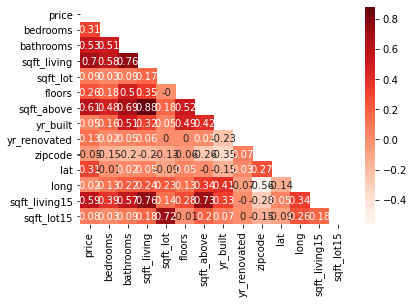

In [6]:
corrprice = kc_house_data.corr().round(2)
mask = np.zeros_like(corrprice)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corrprice,annot=True,cmap='Reds',mask=mask);

In [38]:
#baseline model
baseX = kc_house_data['sqft_living']
y = kc_house_data['price']
baselinemodel = sm.OLS(y, baseX).fit()
baselinemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        11:29:36   Log-Likelihood:                     -3.0011e+05
No. Observations:               21597   AIC:                                  6.002e+05
Df Residuals:                   21596   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

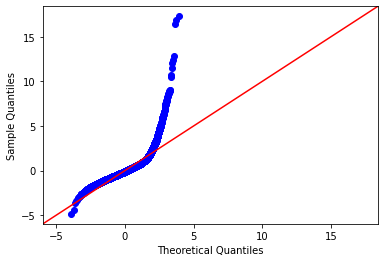

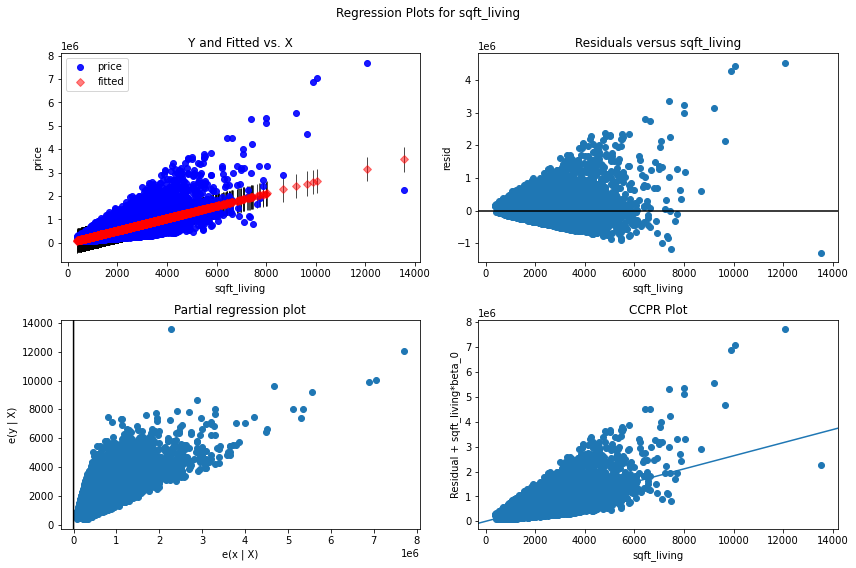

In [8]:
sm.graphics.qqplot(baselinemodel.resid, line='45',fit=True);
sm.graphics.plot_regress_exog(baselinemodel, 'sqft_living', fig=plt.figure(figsize=(12,8)));

### Baseline Model:
The baseline model’s high R squared and low p -value showed that there is a relationship between price and sqft_living. The scatter plots are very heteroscedastic and the Q-Q plot shows the data is not normally distributed. However this model is inconclusive because there is not enough data and sqft_living is too highly correlated with the other predictors.

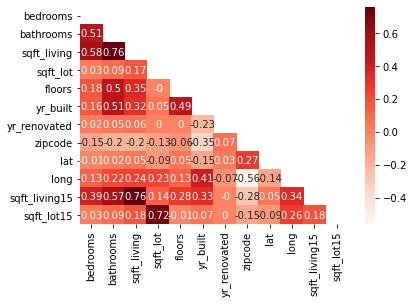

In [9]:
# test for multicollinearity drop correlated predictors
# drop 'sqft_above' because too correlated with other predictors
corr = kc_house_data.drop(['price','sqft_above'],axis=1).corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,cmap='Reds',mask=mask);

### Data cleaning

In [10]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])

In [11]:
kc_house_data.drop(['lat', 'long', 'yr_renovated', 'date', 'sqft_above'], axis=1, inplace=True)

In [12]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 2.6+ MB


In [13]:
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].replace('?', np.NaN).astype(float)
kc_house_data['sqft_basement'].fillna(0, inplace=True)
kc_house_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_basement    float64
yr_built           int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
kc_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
kc_house_data.replace({
    'grade':'[A-Za-z]'},'',regex=True, inplace= True)
kc_house_data['grade'] = kc_house_data['grade'].astype(float)

In [16]:
kc_house_data['waterfront'].fillna('NO', inplace=True)
kc_house_data['view'].fillna('NONE', inplace=True)
kc_house_data.shape

(21597, 15)

In [39]:
# One hot encoding categorical variables
kc_house_data_dummies = pd.get_dummies(kc_house_data, columns=['waterfront', 'view', 'condition'], drop_first=True)
kc_house_data_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,...,sqft_lot15,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,7.0,0.0,1955,98178,...,5650,0,0,0,0,1,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,2.0,7.0,400.0,1951,98125,...,7639,0,0,0,0,1,0,0,0,0
5631500400,180000.0,2,1.00,770,10000,1.0,6.0,0.0,1933,98028,...,8062,0,0,0,0,1,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1.0,7.0,910.0,1965,98136,...,5000,0,0,0,0,1,0,0,0,1
1954400510,510000.0,3,2.00,1680,8080,1.0,8.0,0.0,1987,98074,...,7503,0,0,0,0,1,0,0,0,0


### Build first model

In [18]:
X = kc_house_data_dummies.drop('price', axis=1)

In [19]:
firstmodel = sm.OLS(y, X).fit()

In [20]:
firstmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              8843.
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        12:28:52   Log-Likelihood:                     -2.9587e+05
No. Observations:               21597   AIC:                                  5.918e+05
Df Residuals:                   21577   BIC:                                  5.919e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms            -3.899e+04   2030.505    -19.200      0.000    -4.3e+04    -3.5e+04
bathrooms            4.673e+04   3472.233     13.459      0.000    3.99e+04    5.35e+04
sqft_living           159.5027      3.885     41.058      0.000     151.888     167.117
sqft_lot                0.0115      0.051      0.224      0.823      -0.089       0.112
floors               2.649e+04   3771.380      7.023      0.000    1.91e+04    3.39e+04
grade                1.209e+05   2255.737     53.579      0.000    1.16e+05    1.25e+05
sqft_basement           6.3952      4.505      1.420      0.156      -2.434      15.225
yr_built            -3583.6149     66.783    -53.661      0.000   -3714.514   -3452.716
zipcode                64.4380      1.297     49.675      0.000      61.895      66.981
sqft_living15          25.6639      3.594      7.141      0.000      18.620      32.708
sqft_lot15             -0.5385      0.078     -6.883      0.000      -0.692      -0.385
waterfront_YES       5.292e+05   2.18e+04     24.244      0.000    4.86e+05    5.72e+05
view_EXCELLENT       2.339e+05   1.63e+04     14.326      0.000    2.02e+05    2.66e+05
view_FAIR            5.594e+04   1.38e+04      4.061      0.000    2.89e+04    8.29e+04
view_GOOD            5.906e+04   1.19e+04      4.971      0.000    3.58e+04    8.23e+04
view_NONE           -4.791e+04   7344.257     -6.523      0.000   -6.23e+04   -3.35e+04
condition_Fair      -2661.2372   1.68e+04     -0.159      0.874   -3.55e+04    3.02e+04
condition_Good       1.278e+04   3638.914      3.513      0.000    5650.153    1.99e+04
condition_Poor      -5338.1910   4.02e+04     -0.133      0.894   -8.42e+04    7.35e+04
condition_Very Good  4.929e+04   5878.721      8.384      0.000    3.78e+04    6.08e+04
==============================================================================
Omnibus:                    16372.869   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1212309.227
Skew:                           3.042   Prob(JB):                         0.00
Kurtosis:                      39.196   Cond. No.                     2.76e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

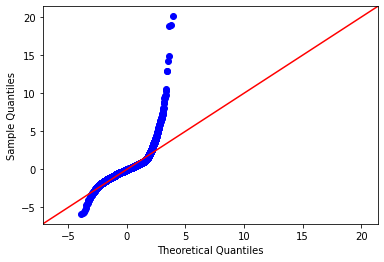

In [21]:
sm.graphics.qqplot(firstmodel.resid, line='45',fit=True);

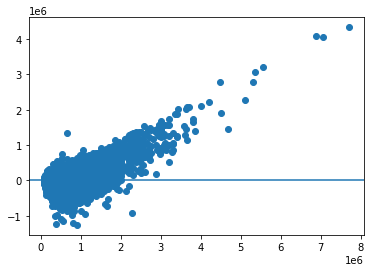

In [22]:
plt.scatter(kc_house_data['price'],firstmodel.resid)
plt.axhline(0);

## First model:
The first model has a high R-squared of 0.891 and low p-values on most of the predictors. The scatter plot is still too heteroscedastic and the Q-Q plot still shows that the data is not normally distributed. My next step is build a new model with none of the predictors with high p-values, add a constant column to the model, and use the log of the dependent variable. 

In [23]:
# Remove high p values and add constant
X.drop(['sqft_basement','sqft_lot','condition_Fair','condition_Good','condition_Poor','condition_Very Good', 'zipcode'], axis=1, inplace = True)

### Build constant model

In [24]:
predictors = sm.add_constant(X)
const_model = sm.OLS(y, predictors).fit()
const_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3152.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        12:28:52   Log-Likelihood:            -2.9590e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21583   BIC:                         5.919e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.761e+06   1.22e+05     55.569      0.000    6.52e+06       7e+06
bedrooms       -3.863e+04   2029.756    -19.032      0.000   -4.26e+04   -3.47e+04
bathrooms       4.992e+04   3420.054     14.596      0.000    4.32e+04    5.66e+04
sqft_living      161.9778      3.582     45.214      0.000     154.956     169.000
floors          2.247e+04   3404.141      6.602      0.000    1.58e+04    2.91e+04
grade           1.206e+05   2244.306     53.717      0.000    1.16e+05    1.25e+05
yr_built       -3800.7185     64.491    -58.934      0.000   -3927.125   -3674.312
sqft_living15     22.5669      3.525      6.402      0.000      15.657      29.477
sqft_lot15        -0.5419      0.056     -9.745      0.000      -0.651      -0.433
waterfront_YES  5.272e+05   2.19e+04     24.127      0.000    4.84e+05     5.7e+05
view_EXCELLENT  2.377e+05   1.63e+04     14.556      0.000    2.06e+05     2.7e+05
view_FAIR       5.621e+04   1.38e+04      4.076      0.000    2.92e+04    8.32e+04
view_GOOD       5.974e+04   1.19e+04      5.028      0.000    3.65e+04     8.3e+04
view_NONE       -5.04e+04   7318.785     -6.887      0.000   -6.47e+04   -3.61e+04
==============================================================================
Omnibus:                    16160.679   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1157315.622
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      38.360   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

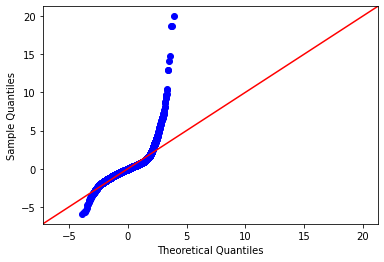

In [25]:
sm.graphics.qqplot(const_model.resid, line='45',fit=True);

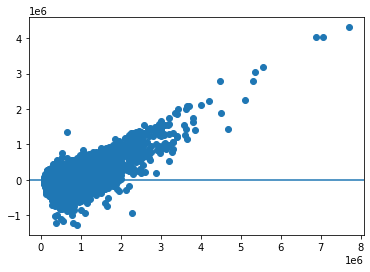

In [26]:
plt.scatter(kc_house_data['price'],const_model.resid)
plt.axhline(0);

### Build Final model

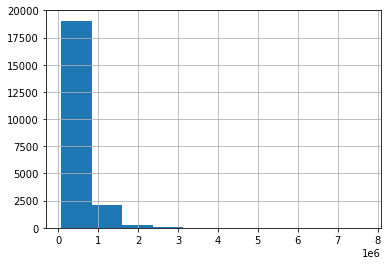

In [27]:
#not normally distributed
y.hist();

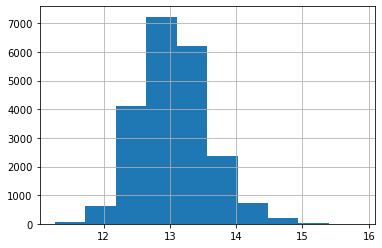

In [41]:
# log normal distribution
y_scld = np.log(y)
y_scld.hist();

In [29]:
logmodel = sm.OLS(y_scld, predictors).fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3081.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        12:28:53   Log-Likelihood:                -5461.1
No. Observations:               21597   AIC:                         1.095e+04
Df Residuals:                   21583   BIC:                         1.106e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.6528      0.176    128.942      0.000      22.308      22.997
bedrooms          -0.0208      0.003     -7.100      0.000      -0.027      -0.015
bathrooms          0.0946      0.005     19.157      0.000       0.085       0.104
sqft_living        0.0001   5.17e-06     24.804      0.000       0.000       0.000
floors             0.0835      0.005     16.981      0.000       0.074       0.093
grade              0.2047      0.003     63.167      0.000       0.198       0.211
yr_built          -0.0060   9.31e-05    -64.309      0.000      -0.006      -0.006
sqft_living15   9.477e-05   5.09e-06     18.618      0.000    8.48e-05       0.000
sqft_lot15     -3.718e-07   8.03e-08     -4.630      0.000   -5.29e-07   -2.14e-07
waterfront_YES     0.3189      0.032     10.107      0.000       0.257       0.381
view_EXCELLENT     0.1444      0.024      6.127      0.000       0.098       0.191
view_FAIR          0.0823      0.020      4.132      0.000       0.043       0.121
view_GOOD          0.0264      0.017      1.539      0.124      -0.007       0.060
view_NONE         -0.0884      0.011     -8.362      0.000      -0.109      -0.068
==============================================================================
Omnibus:                      110.327   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.906
Skew:                          -0.144   Prob(JB):                     1.51e-26
Kurtosis:                       3.221   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

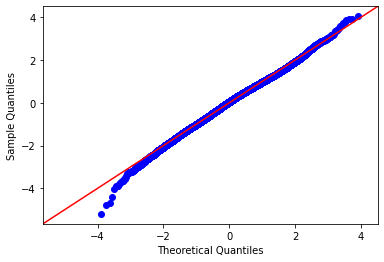

In [30]:
sm.graphics.qqplot(logmodel.resid, line='45',fit=True);

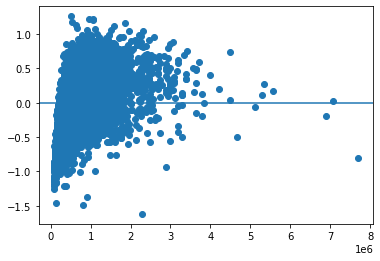

In [31]:
plt.scatter(kc_house_data['price'],logmodel.resid)
plt.axhline(0);

In [35]:
logmodel.params.sort_values().round(4)

view_NONE         -0.0884
bedrooms          -0.0208
yr_built          -0.0060
sqft_lot15        -0.0000
sqft_living15      0.0001
sqft_living        0.0001
view_GOOD          0.0264
view_FAIR          0.0823
floors             0.0835
bathrooms          0.0946
view_EXCELLENT     0.1444
grade              0.2047
waterfront_YES     0.3189
const             22.6528
dtype: float64

## Final model:
On the final model the R-squared score dropped to 0.650 but most the predictors have a low p-value. The Q-Q plot shows the model is normally distributed and the scatter plot shows the data is homooscedastic. 

# Conclusion

* Based on the coefficients of the final version of my model the `waterfront_YES`  column has the strongest positive impact on price 
* The coefficient is 0.3189 which means if the house is waterfront property the price should be 31.89% higher than if it was not waterfront 
* The `grade` column was the second highest, if the grade goes up a point the house value increases by 20.47% 
* The `bathrooms` column was the highest correlated column that could be practically renovated, adding a bathroom could increase house value by 9.5% 


### Next Steps

Additional analysis could provide further insights into how to improve likelihood of renovation success.

Too many columns deal with factors that can’t be changed I would suggest building a regression model only out of columns with data that can be renovated. If I had more time I would also remove outliers to reduce error and get a more homoscedadtic model.